<a href="https://colab.research.google.com/github/JetiAprilia9/IPSD-Assignment/blob/main/Tugas_3_IPSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi

from sklearn.impute import KNNImputer #imputasi
from sklearn.preprocessing import StandardScaler #scaling
from imblearn.over_sampling import SMOTE #oversampling
from wordcloud import WordCloud #visualisasi

In [2]:
df = pd.read_csv('/content/diabetes - diabetes.csv')

In [3]:
df.isnull().sum()

,0
Pregnancies,77
Glucose,115
BloodPressure,154
SkinThickness,38
Insulin,192
BMI,230
DiabetesPedigreeFunction,77
Age,154
Outcome,0


In [4]:
(df.isnull().sum()/len(df))*100

,0
Pregnancies,10.026042
Glucose,14.973958
BloodPressure,20.052083
SkinThickness,4.947917
Insulin,25.000000
BMI,29.947917
DiabetesPedigreeFunction,10.026042
Age,20.052083
Outcome,0.000000


In [6]:
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      NaN           72.0           35.0      0.0   NaN   
1          1.0     85.0           66.0           29.0      0.0   NaN   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0      NaN           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     627.0   NaN        1  
1                     351.0  31.0        0  
2                     672.0  32.0        1  
3                     167.0  21.0        0  
4                       NaN  33.0        1  


<ipython-input-6-848d7e8cfa83>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)


In [7]:
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace=True)
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      NaN           72.0           35.0      0.0   NaN   
1          1.0     85.0           66.0           29.0      0.0   NaN   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0      NaN           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     627.0   NaN        1  
1                     351.0  31.0        0  
2                     672.0  32.0        1  
3                     167.0  21.0        0  
4                       NaN  33.0        1  


<ipython-input-7-59da3ed4b25f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace=True)


In [8]:
df['BloodPressure'].fillna(df['BloodPressure'].mode(), inplace=True)
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      NaN           72.0           35.0      0.0   NaN   
1          1.0     85.0           66.0           29.0      0.0   NaN   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0      NaN           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     627.0   NaN        1  
1                     351.0  31.0        0  
2                     672.0  32.0        1  
3                     167.0  21.0        0  
4                       NaN  33.0        1  


<ipython-input-8-776fb8663280>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BloodPressure'].fillna(df['BloodPressure'].mode(), inplace=True)


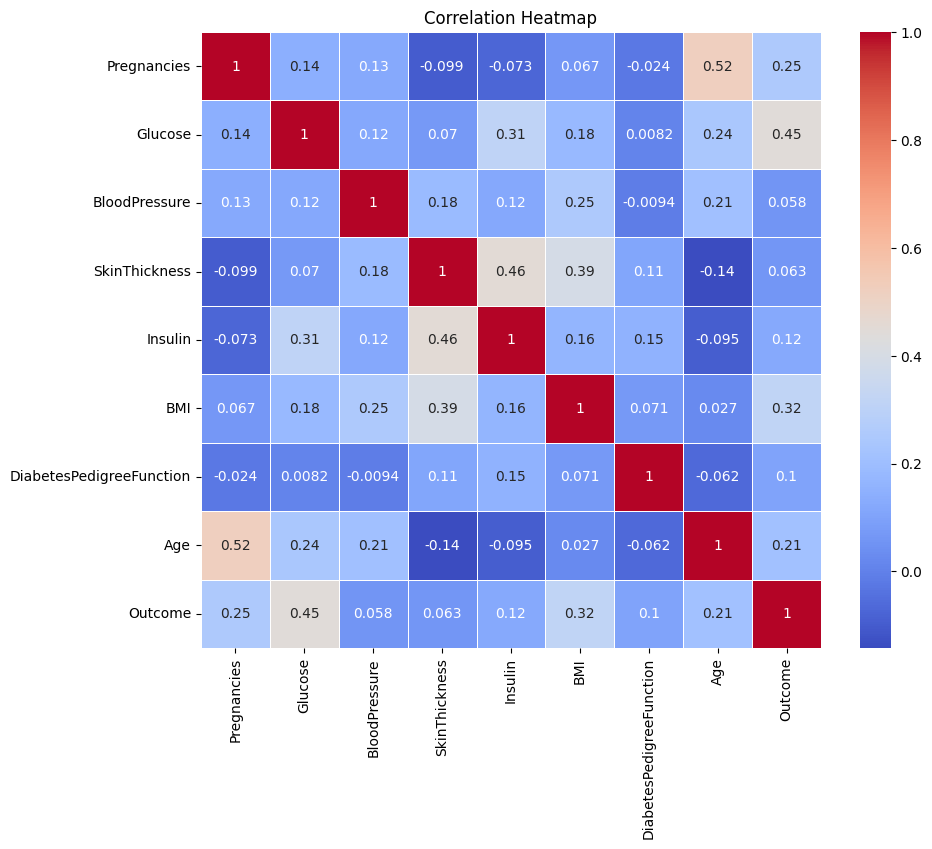

In [10]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Untuk mengetahui korelasi antar kolom maka menggunakan kode di atas dengan hasil visualisasi di bawah ini.
# Maka dari cool ke warm dalam setiap kolom akan berbeda tergantung pada semakin merah atau biru semakin banyak korelasinya atau semakin sedikit

In [13]:
from sklearn.utils import resample
import pandas as pd

df_majority = df[df['Outcome'] == 0]
df_minority = df[df['Outcome'] == 1]

df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

df_balanced = pd.concat([df_majority_downsampled, df_minority])

print(df_balanced['Outcome'].value_counts())

df_minority = df[df['Outcome'] == 1]

df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

df_balanced = pd.concat([df_majority_downsampled, df_minority])

print(df_balanced['Outcome'].value_counts())

#Dengan menggunakan kode ini kita akan dapat mengatasi masalah perbedaan nilai pada suatu kelas di dalam dataset
#Sehingga dataset yang sebelumnya setiap kelasnya ada perbedaan, setelah menggunakan kode ini telah bisa untuk digunakan untuk diolah datanya

Outcome
0    268
1    268
Name: count, dtype: int64
Outcome
0    268
1    268
Name: count, dtype: int64


In [14]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

X = df_balanced.drop(columns=['Outcome'])
y = df_balanced['Outcome']
# Untuk x berarti bahwa kolom berisi semua kolom dari dataset, lalu untuk y adalah target yang akan diprediksi oleh model

robust_scaler = RobustScaler()
X_robust_scaled = robust_scaler.fit_transform(X)
# Lalu disini robust_scaler berfungsi untuk scaling data dengan median dan IQR agar jika ada outlier tidak akan terlalu berpengaruh

minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)
# Lalu disini akan di lambangkan dengan skala 0 dan 1 dan mengubah nilai-nilai menjadi lambang tersebut agar menentukan skala dari rentang nilai tertentu

X_robust_scaled_df = pd.DataFrame(X_robust_scaled, columns=X.columns)
X_minmax_scaled_df = pd.DataFrame(X_minmax_scaled, columns=X.columns)
# Lalu disini akan diubah menjadi array agar lebih mudah ke langkah selanjutnya apabila diolah

print(X_robust_scaled_df.head())
print(X_minmax_scaled_df.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0         -0.4 -0.545455       0.086726        0.50000       NaN       NaN   
1          0.4       NaN      -1.746607       -0.75000 -0.130769  0.121212   
2          0.0 -0.227273      -0.913274        0.21875  0.207692 -0.387879   
3         -0.2  0.181818       1.253393       -0.75000 -0.130769 -0.569697   
4          0.8 -0.431818       0.420060        0.50000       NaN  0.545455   

   DiabetesPedigreeFunction     Age  
0                 -0.203012 -0.0625  
1                  0.939096 -0.3750  
2                 -0.772940 -0.5625  
3                 -0.030124 -0.2500  
4                 -0.239686     NaN  
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.058824  0.487437       0.614035       0.404040       NaN       NaN   
1     0.294118       NaN       0.421053       0.000000  0.000000  0.502235   
2     0.176471  0.557789       0.508772       0.313131  0.081031  0.4